In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import jieba  
from pathlib import Path
from wordcloud import WordCloud


def text_analysis(df):
    # Merge all text
    all_text = ' '.join(df['文本标题'].fillna('') + ' ' + df['文本内容'].fillna(''))
    
    # Basic statistics
    total_chars = len(all_text)  # Total number of characters
    unique_chars = len(set(all_text))  # Number of unique characters
    
    print(f"Total characters: {total_chars}")
    print(f"Unique characters: {unique_chars}")
def chinese_text_analysis(df):
    # Merge all text
    all_content = ' '.join(df['文本内容'].fillna(''))
    all_title = ' '.join(df['文本标题'].fillna(''))
    
    # Chinese word segmentation
    content_words = jieba.lcut(all_content)
    title_words = jieba.lcut(all_title)
    
    # Remove stop words and short words
    stop_words = set(['的', '了', '在', '是', '我', '有', '和', '就', '不', '人', '都', '一', '一个', '上', '也', '很', '到', '说', '要', '去', '你', '会', '着', '没有', '看', '好', '自己', '这个', '那个'])
    content_words = [word for word in content_words if len(word) > 1 and word not in stop_words]
    title_words = [word for word in title_words if len(word) > 1 and word not in stop_words]
    
    # Word frequency statistics
    content_word_freq = Counter(content_words)
    title_word_freq = Counter(title_words)
    
    return content_word_freq, title_word_freq

def _resolve_font_path() -> str | None:
    font_candidates = [
        '/System/Library/Fonts/PingFang.ttc',
        '/System/Library/Fonts/STHeiti Light.ttc',
        '/Library/Fonts/Songti.ttc',
        '/System/Library/Fonts/Hiragino Sans GB.ttc',
        'C:/Windows/Fonts/simhei.ttf'
    ]
    for font in font_candidates:
        if Path(font).exists():
            return font
    return None

def create_visualizations(df,basedata, content_word_freq, title_word_freq):
    # Set Chinese font
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Heiti TC', 'WenQuanYi Zen Hei', 'SimHei']
    plt.rcParams['axes.unicode_minus'] = False  # To display minus sign correctly
    
    # 1. Article length distribution
    df['title_length'] = df['文本标题'].str.len()
    df['content_length'] = df['文本内容'].str.len()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Title and Article Length and Word Frequency Analysis-- {basedata}', fontsize=16)
    
    # Title length distribution
    axes[0,0].hist(df['title_length'], bins=20, alpha=0.7, color='#B395BD')
    axes[0,0].set_title('Title Length Distribution')
    axes[0,0].set_xlabel('Title Length')
    axes[0,0].set_ylabel('Frequency')
    
    # Content length distribution
    axes[0,1].hist(df['content_length'], bins=20, alpha=0.7, color='#456990')
    axes[0,1].set_title('Content Length Distribution')
    axes[0,1].set_xlabel('Content Length')
    axes[0,1].set_ylabel('Frequency')
    
    # 2. High-frequency words bar chart (Content)
    top_content_words = content_word_freq.most_common(15)
    words, counts = zip(*top_content_words)
    axes[1,0].barh(words, counts, color='#7DAEE0')
    axes[1,0].set_title('Top 15 High-Frequency Words in Content')
    axes[1,0].set_xlabel('Frequency')
    
    # 3. High-frequency words bar chart (Title)
    top_title_words = title_word_freq.most_common(15)
    words, counts = zip(*top_title_words)
    axes[1,1].barh(words, counts, color='#EA8379')
    axes[1,1].set_title('Top 15 High-Frequency Words in Title')
    axes[1,1].set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.savefig(f'./picture/{basedata}_xlres.png',dpi=300)
    plt.show()
# generate wordclouds and plotting
def generate_wordclouds(content_word_freq, title_word_freq, basedata):
    font_path = _resolve_font_path()
    content_text = ' '.join([word for word, count in content_word_freq.items() for _ in range(count)])
    title_text = ' '.join([word for word, count in title_word_freq.items() for _ in range(count)])
    
    wc_kwargs = {
        'width': 1024,
        'height': 768,
        'font_path': font_path,
        'collocations': False
    }
  #plotting
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(f'Content and Title Word Clouds-- {basedata}', fontsize=16)
    if content_text.strip():
        wc_content = WordCloud(background_color='white', **wc_kwargs).generate(content_text)
        axes[0].imshow(wc_content, interpolation='bilinear')
        axes[0].set_title('Content Word Cloud')
        axes[0].axis('off')
    if title_text.strip():
        wc_title = WordCloud(background_color='black', **wc_kwargs).generate(title_text)
        axes[1].imshow(wc_title, interpolation='bilinear')
        axes[1].set_title('Title Word Cloud')
        axes[1].axis('off')
    plt.savefig(f'./picture/{basedata}_wordclouds.png',dpi=300)
    plt.show()

In [60]:

def complete_analysis(df, basedata):
    print(f"Starting text analysis for {basedata}...")
    
    # basic statistics
    all_text = ' '.join(df['文本标题'].fillna('') + ' ' + df['文本内容'].fillna(''))
    total_chars = len(all_text)
    unique_chars = len(set(all_text))
    
    print(f"Total characters: {total_chars:,}")
    print(f"Unique characters: {unique_chars:,}")
    print(f"Number of articles: {len(df):,}")
    
    # Word frequency analysis
    content_freq, title_freq = chinese_text_analysis(df)
    
    # Visualization
    create_visualizations(df,basedata, content_freq, title_freq)
    
    # Generate word clouds
    generate_wordclouds(content_freq, title_freq, basedata)
    
    # Output detailed statistics
    print("\nTop 10 high-frequency words in content:")
    for word, count in content_freq.most_common(10):
        print(f"  {word}: {count} times")
    
    print("\nTop 10 high-frequency words in title:")
    for word, count in title_freq.most_common(10):
        print(f"  {word}: {count} times")
    
    return content_freq, title_freq



In [61]:
# Article Complexity Analysis
def complexity_analysis(df,basedata):
    df['avg_word_length'] = df['文本内容'].apply(lambda x: 
        sum(len(word) for word in jieba.lcut(str(x))) / max(1, len(jieba.lcut(str(x))))
    )
    
    # Lexical richness
    def lexical_richness(text):
        words = jieba.lcut(str(text))
        if len(words) == 0:
            return 0
        return len(set(words)) / len(words)
    
    df['lexical_richness'] = df['文本内容'].apply(lexical_richness)
    # print(df)
    # 可视化词汇丰富度
    fig,ax=plt.subplots(1,2,figsize=(20, 6))
    fig.suptitle(f'Article Complexity Analysis-- {basedata}', fontsize=16)
    # plt.figure(figsize=(10, 6))
    # plt.hist(df['lexical_richness'], bins=20, alpha=0.7, color='#EF767A')
    # plt.title('Lexical Richness Distribution')
    # plt.xlabel('Lexical Richness')
    # plt.ylabel('Number of Articles')
    # plt.savefig(f'./picture/{basedata}_chres.png',dpi=300)
    # plt.show()
    
    # # Visualize average word length
    # plt.figure(figsize=(10, 6))
    # plt.hist(df['avg_word_length'], bins=20, alpha=0.7, color='#456990')
    # plt.title('Average Word Length Distribution')
    # plt.xlabel('Average Word Length')
    # plt.ylabel('Number of Articles')
    # plt.savefig(f'./picture/{basedata}_avglenres.png',dpi=300)
    # plt.show()
    ax[0].hist(df['lexical_richness'], bins=20, alpha=0.7, color='#EF767A')
    ax[0].set_title('Lexical Richness Distribution')
    ax[0].set_xlabel('Lexical Richness')
    ax[0].set_ylabel('Number of Articles')
    ax[1].hist(df['avg_word_length'], bins=20, alpha=0.7, color='#456990')
    ax[1].set_title('Average Word Length Distribution')
    ax[1].set_xlabel('Average Word Length')
    ax[1].set_ylabel('Number of Articles')
    plt.tight_layout()
    plt.savefig(f'./picture/{basedata}_complexity_analysis.png', dpi=300)
    plt.show()

Starting text analysis for xinlangnews...
Total characters: 1,621,830
Unique characters: 3,557
Number of articles: 975


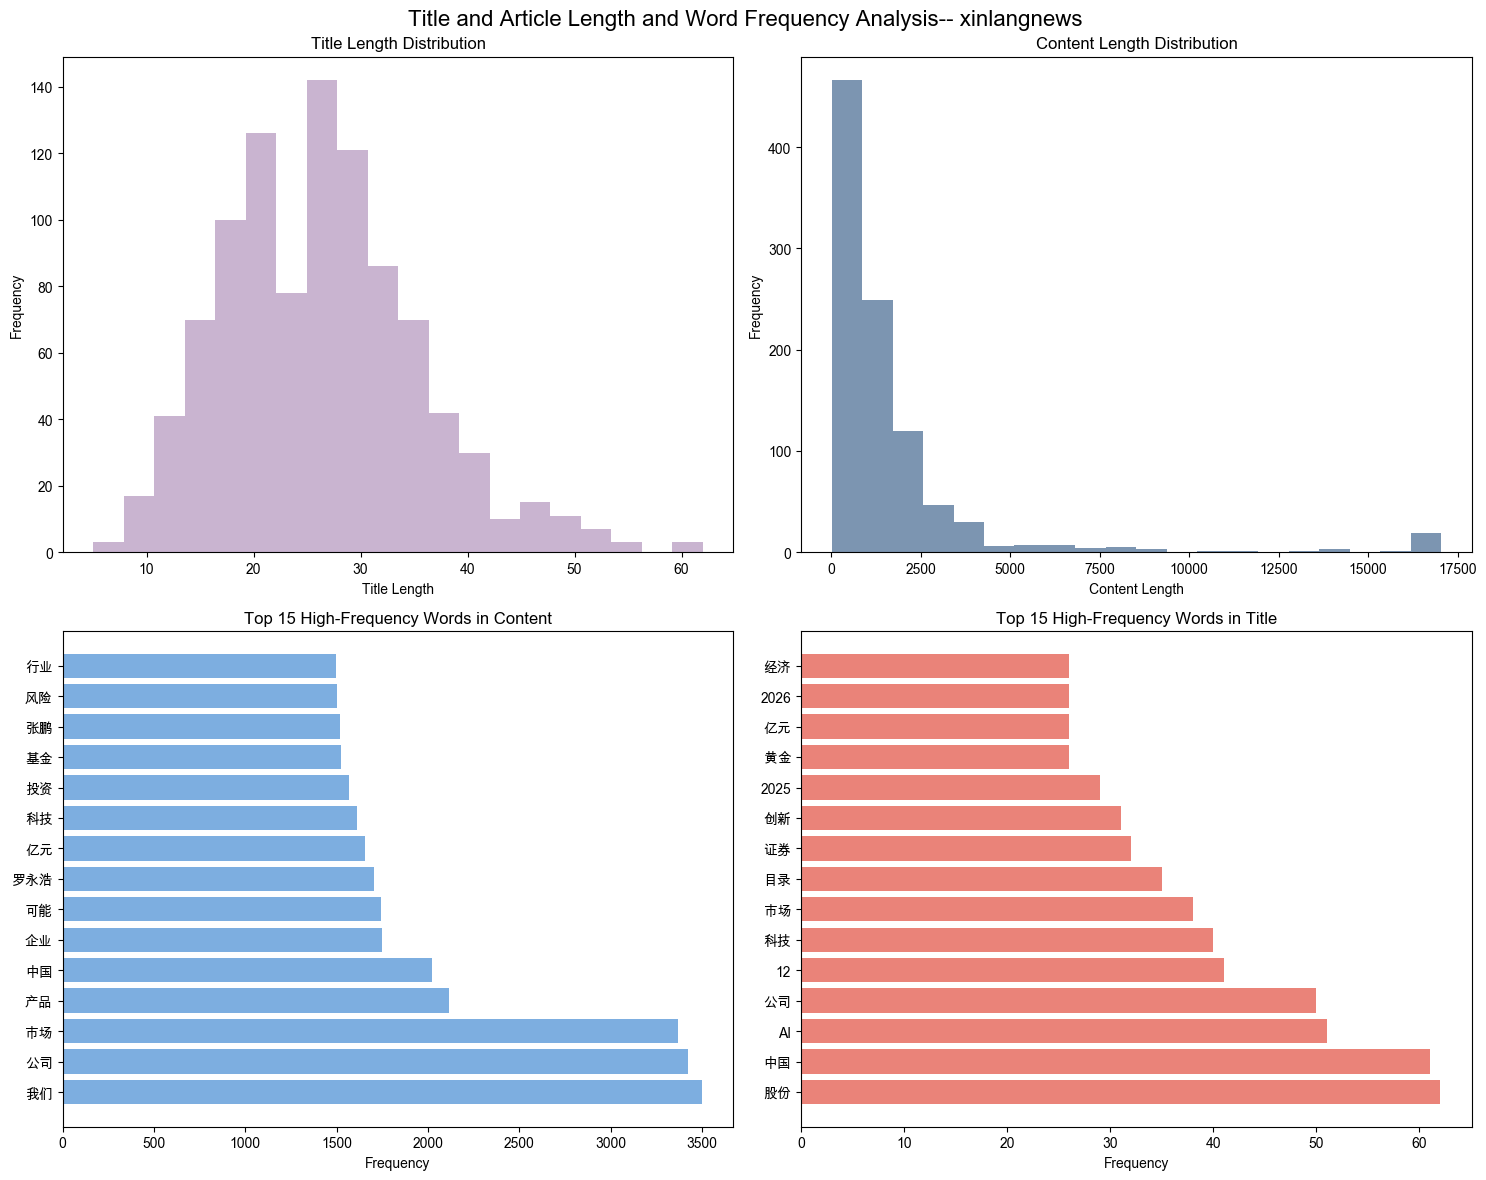

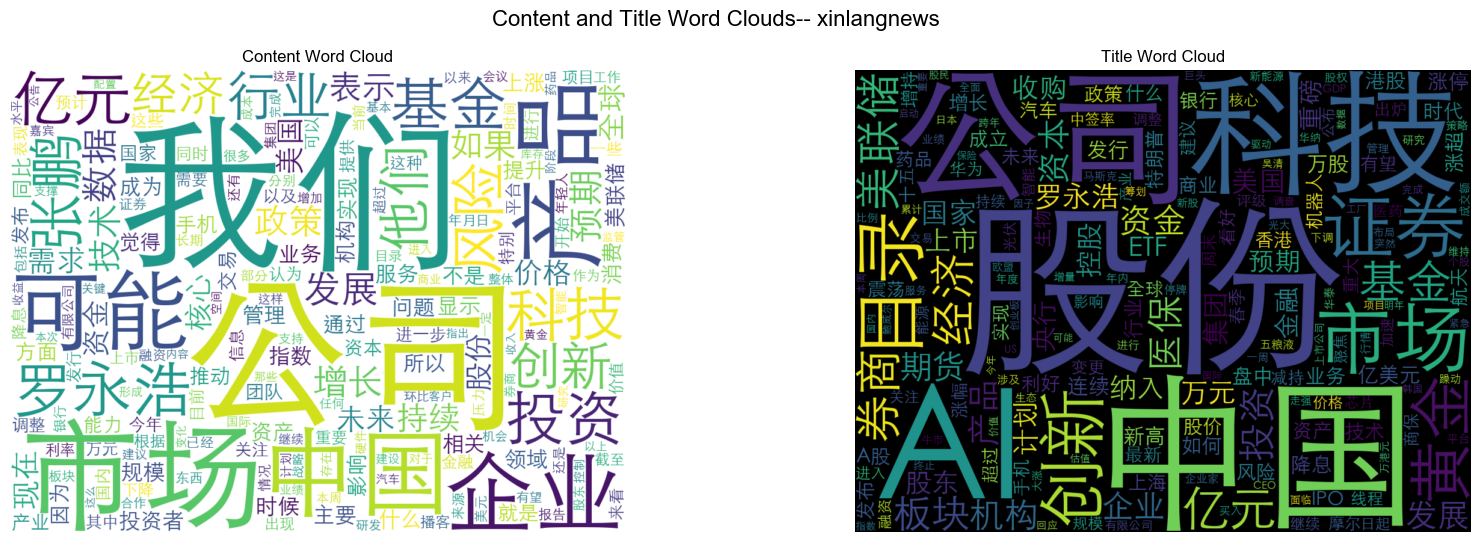


Top 10 high-frequency words in content:
  我们: 3496 times
  公司: 3422 times
  市场: 3367 times
  产品: 2113 times
  中国: 2024 times
  企业: 1748 times
  可能: 1742 times
  罗永浩: 1706 times
  亿元: 1657 times
  科技: 1611 times

Top 10 high-frequency words in title:
  股份: 62 times
  中国: 61 times
  AI: 51 times
  公司: 50 times
  12: 41 times
  科技: 40 times
  市场: 38 times
  目录: 35 times
  证券: 32 times
  创新: 31 times


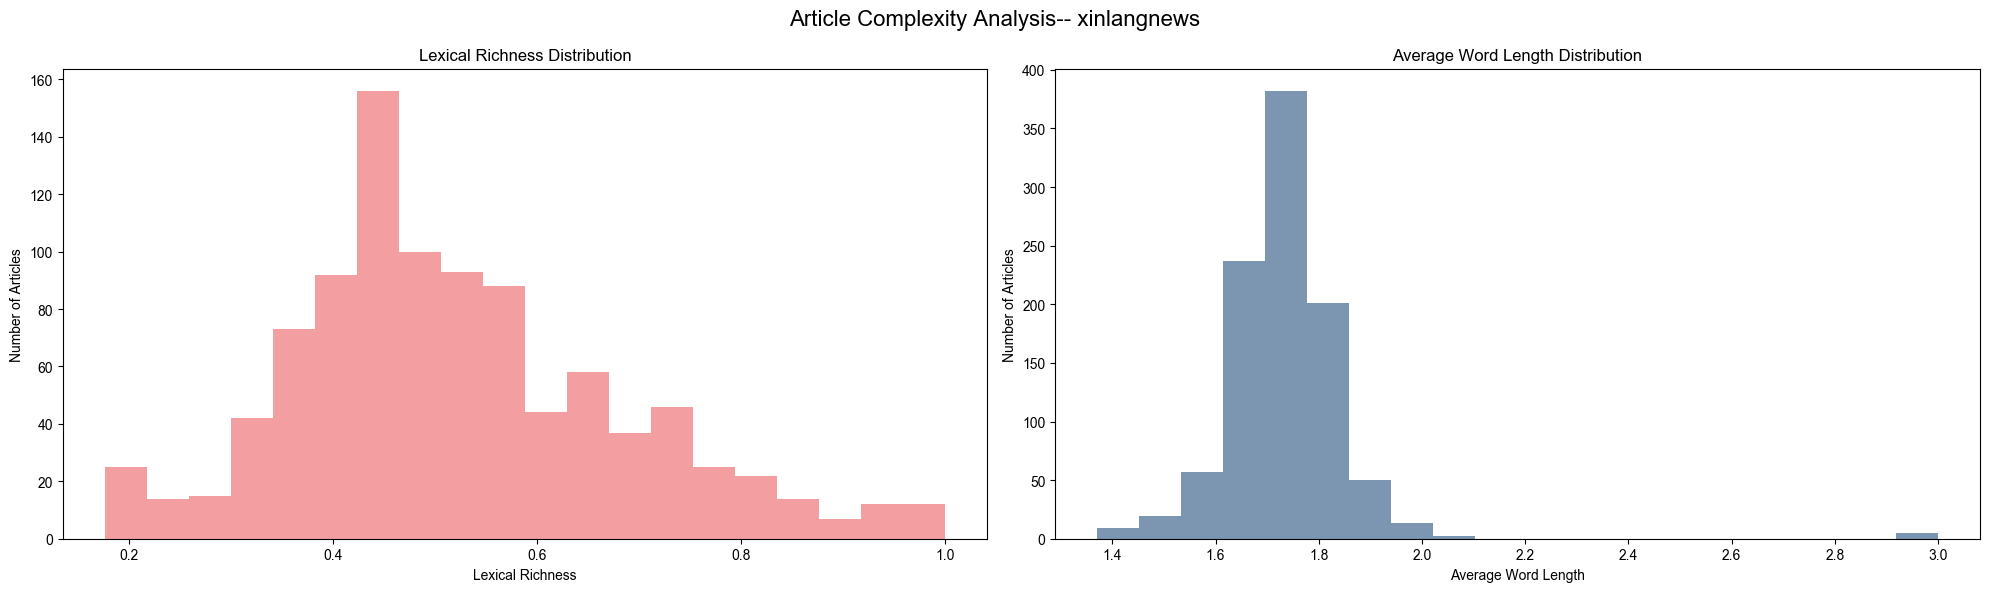

In [62]:
# Xinlang News Analysis
basedata='xinlangnews'
df = pd.read_csv('./data/'+basedata+'.csv')
content_freq, title_freq = complete_analysis(df,basedata)
complexity_analysis(df,basedata)

Starting text analysis for chinanews...
Total characters: 2,573,611
Unique characters: 4,034
Number of articles: 965


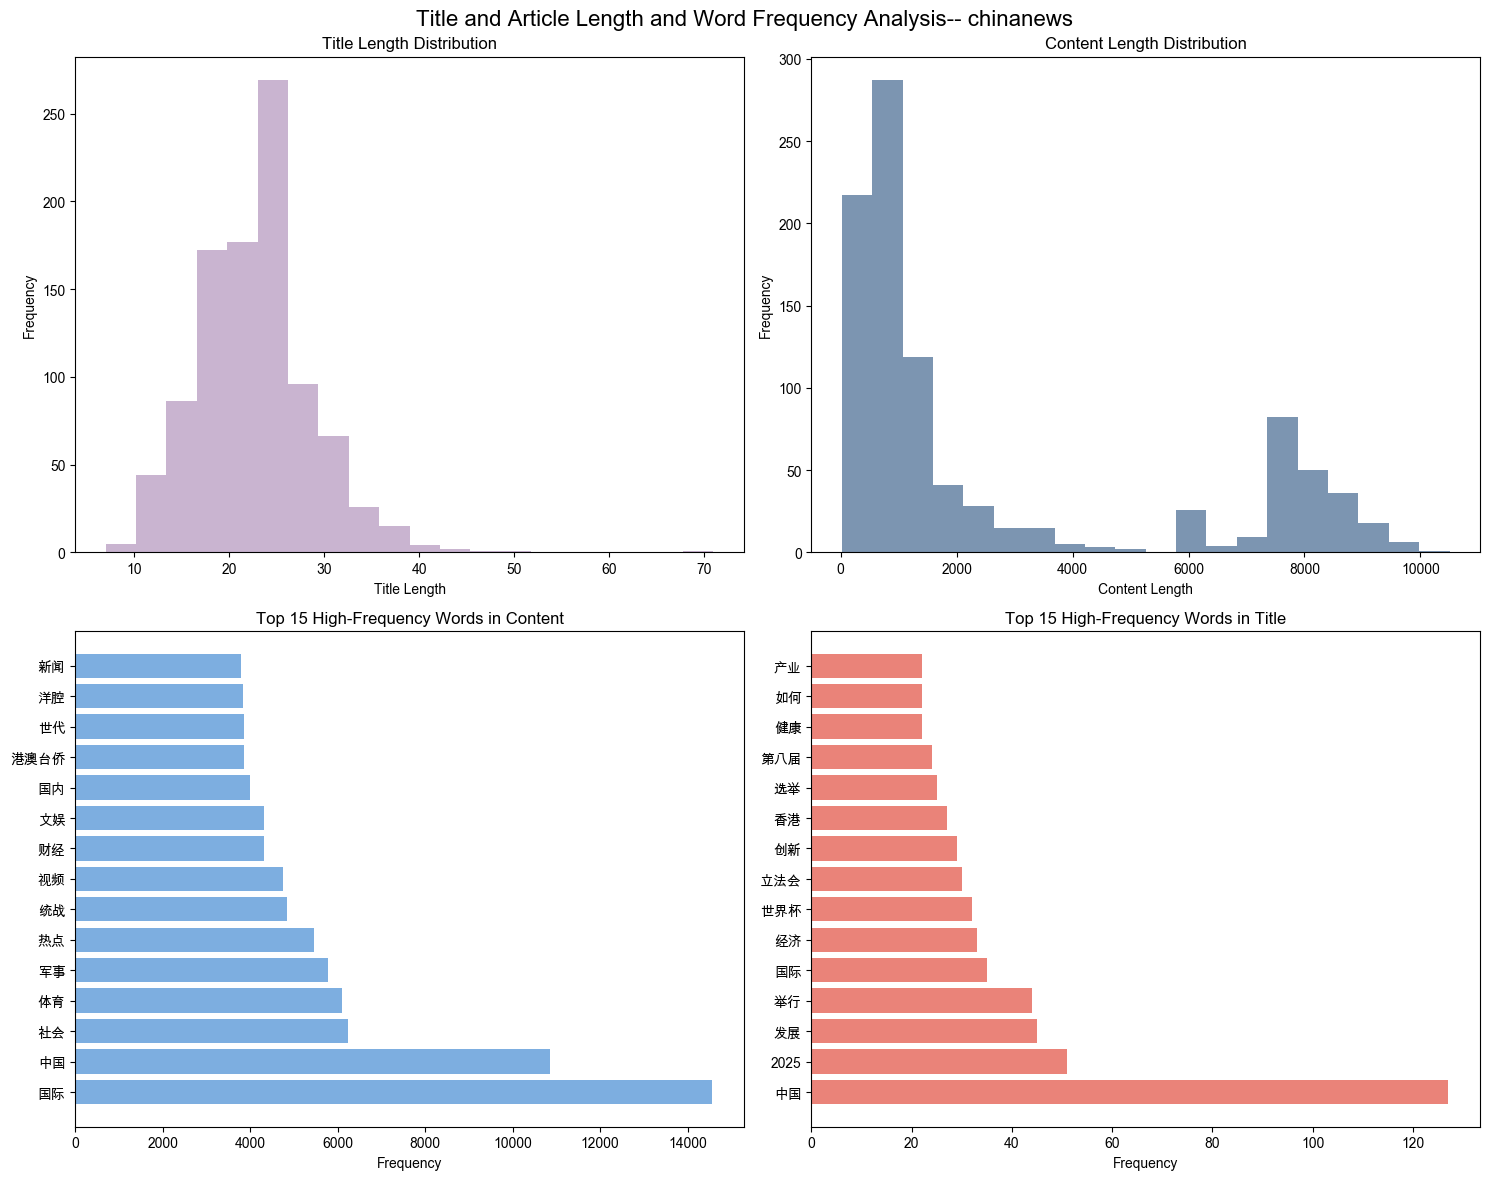

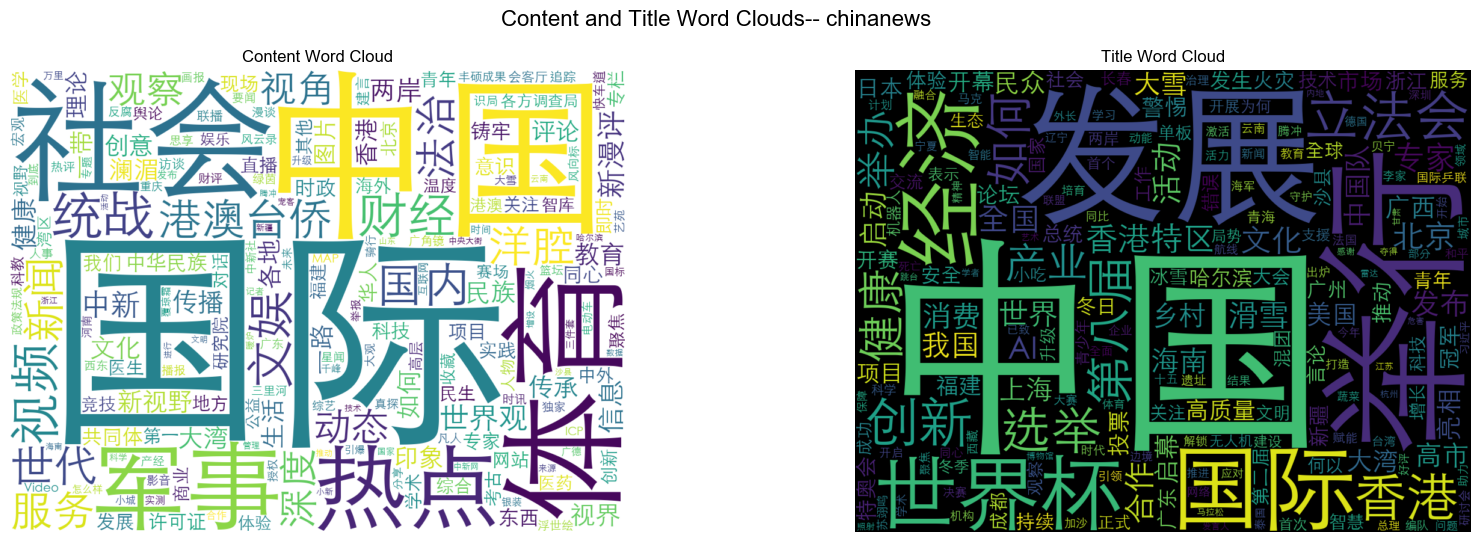


Top 10 high-frequency words in content:
  国际: 14556 times
  中国: 10852 times
  社会: 6243 times
  体育: 6095 times
  军事: 5772 times
  热点: 5466 times
  统战: 4850 times
  视频: 4740 times
  财经: 4314 times
  文娱: 4305 times

Top 10 high-frequency words in title:
  中国: 127 times
  2025: 51 times
  发展: 45 times
  举行: 44 times
  国际: 35 times
  经济: 33 times
  世界杯: 32 times
  立法会: 30 times
  创新: 29 times
  香港: 27 times


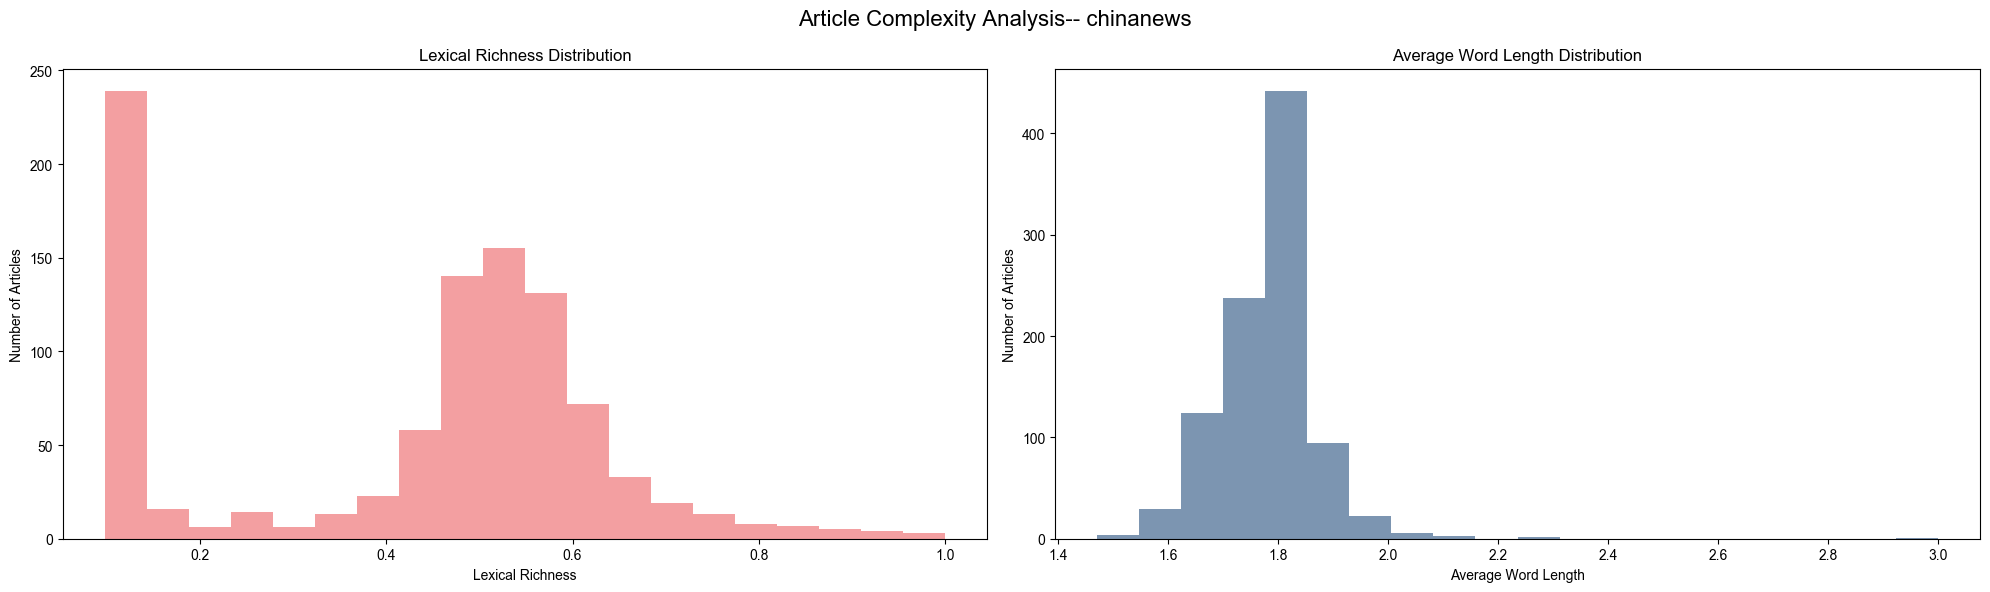

In [63]:
# China News Analysis
basedata='chinanews'
df = pd.read_csv('./data/'+basedata+'.csv')
content_freq, title_freq = complete_analysis(df,basedata)
complexity_analysis(df,basedata)